In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set to display maximum columns
pd.set_option('display.max_columns', None)

In [3]:
# Reading the dataset
air_pass = pd.read_csv("D:\\Data Science\\Datasets\\Power BI\\06_Projects\\02_Airline_passenger_Statisfaction\\airline_passenger_satisfaction.csv")
air_pass.head()

,id,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# checking the dimention
air_pass.shape

(129880, 24)

In [5]:
# Identifying the column information
air_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [6]:
# Checking the null values
air_pass.isnull().sum()

id                                     0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [7]:
# Drop the null values, since we have much data
air_pass.dropna(axis=0, how='any',inplace=True)

In [8]:
# drop the id column since we not require that
air_pass.drop('id',axis=1,inplace=True)
air_pass.shape

(129487, 23)

In [9]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
cat_col = air_pass.select_dtypes(include = ['object'])
le = LabelEncoder()
cat_enco = cat_col.apply(le.fit_transform)

In [10]:
cat_enco

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1
...,...,...,...,...,...
129875,1,1,0,0,0
129876,1,0,0,0,1
129877,0,0,1,1,0
129878,1,0,0,0,1


In [11]:
# Replace the encoded columns
cat_labels = cat_enco.columns
air_pass = air_pass.drop(columns=cat_labels, axis=1)

In [12]:
# Merge the encoded column with the original dataframe
air_pass = pd.concat([air_pass, cat_enco], axis=1)

In [13]:
air_pass.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0,0,1


<Axes: >

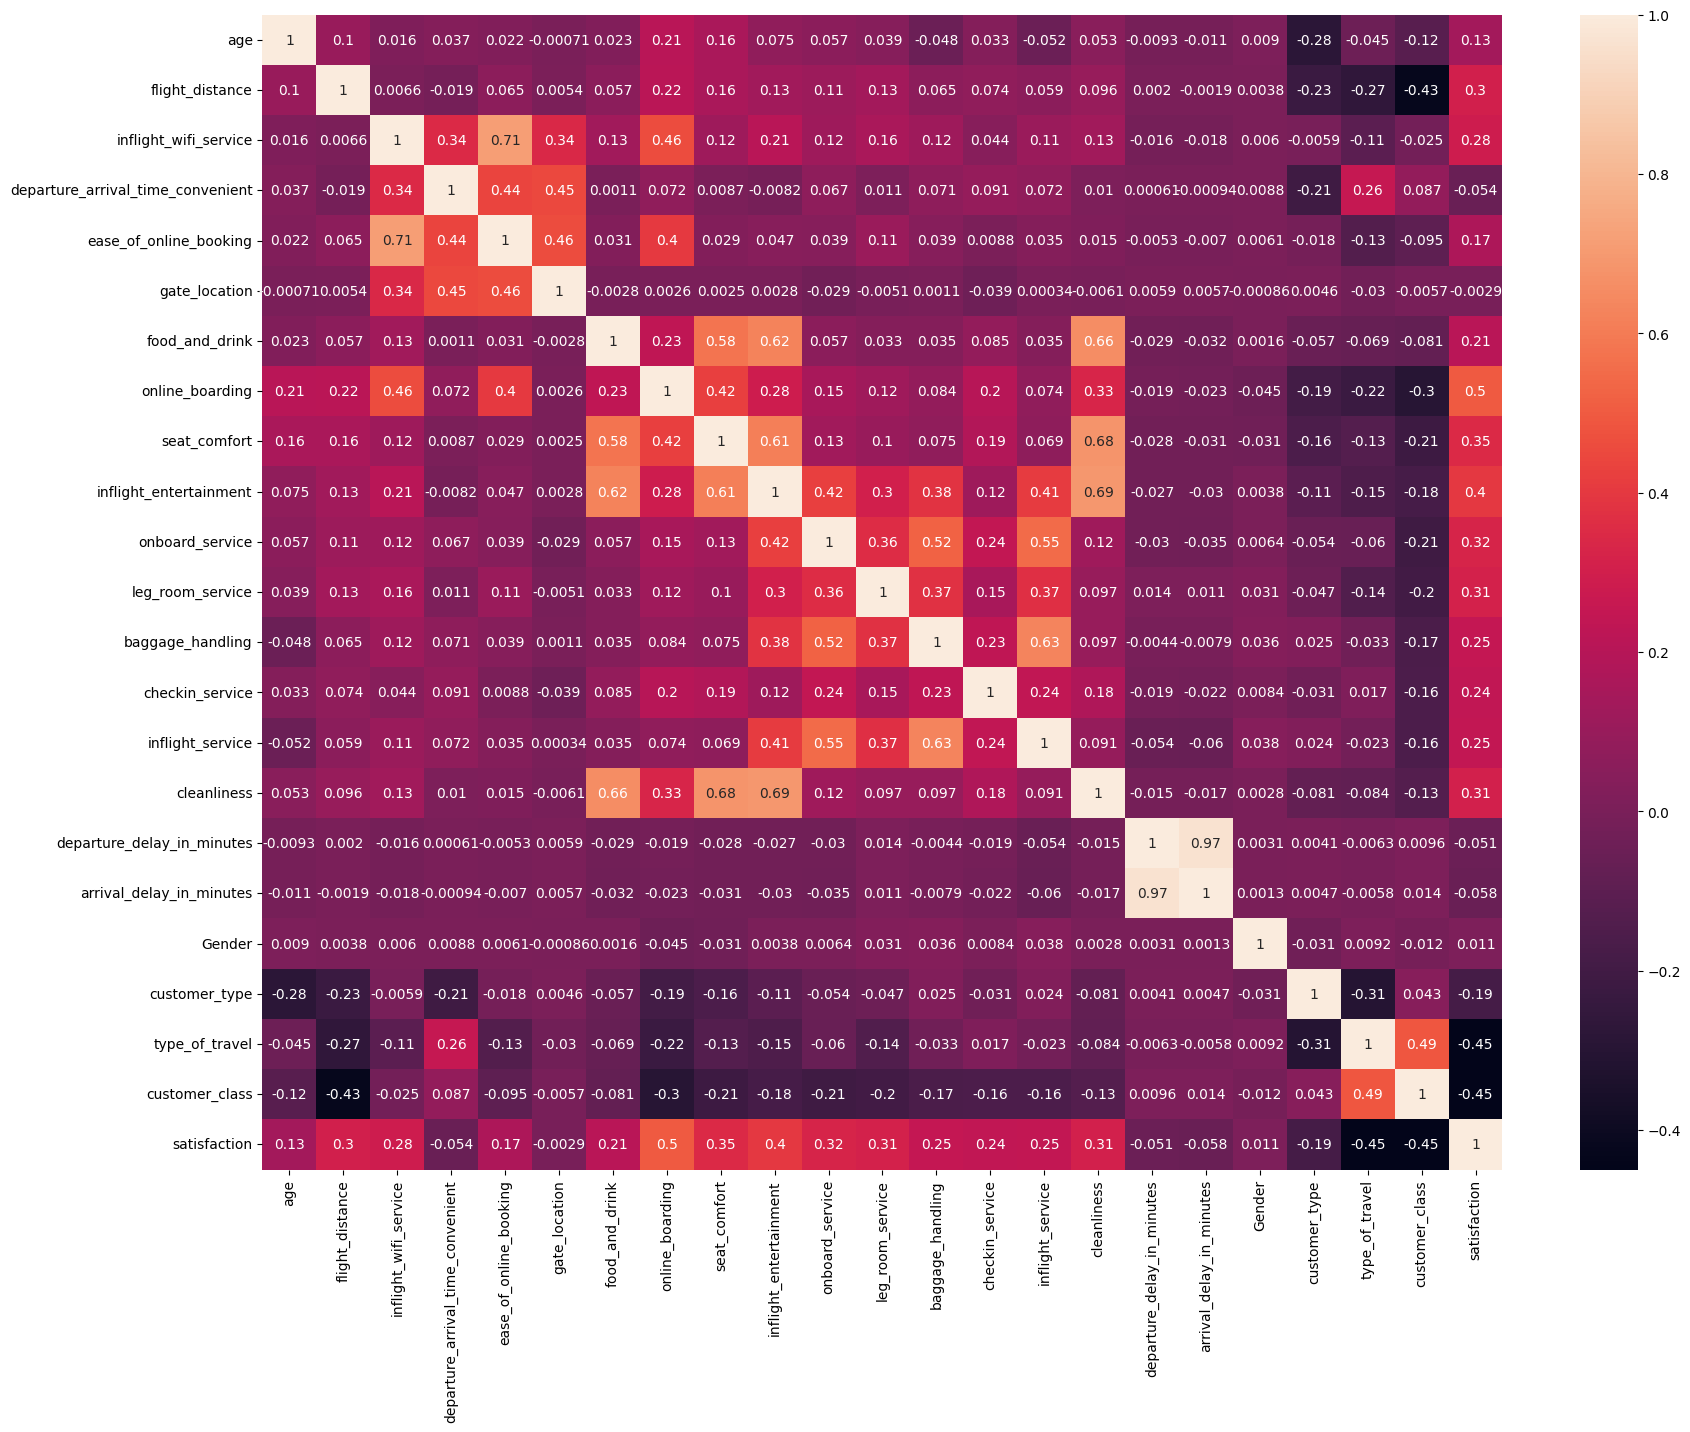

In [14]:
# Plotting the correlation heatmap for identifying the relationship
plt.figure(figsize=(20,15))
sns.heatmap(air_pass.corr(), annot=True)

In [15]:
corr = air_pass[air_pass.columns[1:]].corr()['satisfaction'][:-1]
corr

flight_distance                      0.298206
inflight_wifi_service                0.283291
departure_arrival_time_convenient   -0.054457
ease_of_online_booking               0.168704
gate_location                       -0.002923
food_and_drink                       0.211164
online_boarding                      0.501620
seat_comfort                         0.348576
inflight_entertainment               0.398334
onboard_service                      0.322329
leg_room_service                     0.312557
baggage_handling                     0.248651
checkin_service                      0.237146
inflight_service                     0.245027
cleanliness                          0.306891
departure_delay_in_minutes          -0.051032
arrival_delay_in_minutes            -0.058275
Gender                               0.011496
customer_type                       -0.185925
type_of_travel                      -0.449794
customer_class                      -0.448338
Name: satisfaction, dtype: float64

In [16]:
corr.items

<bound method Series.items of flight_distance                      0.298206
inflight_wifi_service                0.283291
departure_arrival_time_convenient   -0.054457
ease_of_online_booking               0.168704
gate_location                       -0.002923
food_and_drink                       0.211164
online_boarding                      0.501620
seat_comfort                         0.348576
inflight_entertainment               0.398334
onboard_service                      0.322329
leg_room_service                     0.312557
baggage_handling                     0.248651
checkin_service                      0.237146
inflight_service                     0.245027
cleanliness                          0.306891
departure_delay_in_minutes          -0.051032
arrival_delay_in_minutes            -0.058275
Gender                               0.011496
customer_type                       -0.185925
type_of_travel                      -0.449794
customer_class                      -0.448338
Name

In [17]:
names = []
for i, r in corr.items():
    if ((r < 0.06) & (r > -0.06)):
        names.append(i)

In [18]:
names

['departure_arrival_time_convenient',
 'gate_location',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'Gender']

In [21]:
air_pass = air_pass.drop(columns=names)

In [23]:
air_pass.shape

(129487, 18)

In [22]:
air_pass.head()

,age,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,customer_type,type_of_travel,customer_class,satisfaction
0,13,460,3,3,5,3,5,5,4,3,4,4,5,5,0,1,2,0
1,25,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,1
3,25,562,2,5,2,2,2,2,2,5,3,1,4,2,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,4,3,3,3,0,0,0,1


In [24]:
X = air_pass.iloc[:, :-1]
Y = air_pass[['satisfaction']]

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [37]:
log_proba = log_reg.predict_proba(X_test)
log_proba = log_proba[:, 1]
log_pred = log_reg.predict(X_test)

In [38]:
log_reg.score(X_test, y_test)

0.8721303035267136

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
dtree.score(X_test, y_test)

0.9442793288245068